##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

08/05/2021  10:39 AM    <DIR>          .
08/05/2021  10:39 AM    <DIR>          ..
08/05/2021  10:37 AM    <DIR>          .ipynb_checkpoints
08/02/2021  02:01 PM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/02/2021  02:15 PM    <DIR>          8_2_2021
08/02/2021  03:39 PM           161,361 8_2_2021_FortranErequals1.ipynb
08/03/2021  01:17 PM           130,779 8_2_2021_PythonErequals1.ipynb
08/02/2021  02:58 PM           130,726 8_2_2021_PythonVariedNuni.ipynb
08/04/2021  02:42 PM           130,779 8_2_2021_PythonVariedNuni-Copy3.ipynb
08/02/2021  02:52 PM    <DIR>          8_2_2021P
08/03/2021  03:01 PM           225,696 8_3_2021_SphereTest_Python.ipynb
08/05/2021  10:30 AM            93,725 852021_FDefaultCapsol.ipynb
08/05/2021  10:34 AM            17,002 852021_FOriginalTirmzi.ipynb
08/05/2021  10:33 AM        

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("Original Tirmzi/*/")
folders


['Original Tirmzi\\0336-RR_originalTirmzi-0002\\',
 'Original Tirmzi\\0338-RR_originalTirmzi-0001\\',
 'Original Tirmzi\\0340-RR_originalTirmzi-0003\\',
 'Original Tirmzi\\0342-RR_originalTirmzi-0000\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'C-Z.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=False)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'Original Tirmzi\\0336-RR_originalTirmzi-0002\\': {'z': array([150., 152., 154., 156., 158., 160., 162., 164., 166., 168., 170.,
         172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
         194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
         216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236.,
         238., 240., 242., 244., 246., 248.]),
  'c': array([1.54338638e-15, 1.54322577e-15, 1.54306575e-15, 1.54290629e-15,
         1.54274740e-15, 1.54258906e-15, 1.54243127e-15, 1.54227400e-15,
         1.54211726e-15, 1.54196103e-15, 1.54180532e-15, 1.54165009e-15,
         1.54149536e-15, 1.54134111e-15, 1.54118734e-15, 1.54103404e-15,
         1.54088119e-15, 1.54072880e-15, 1.54057686e-15, 1.54042535e-15,
         1.54027429e-15, 1.54012365e-15, 1.53997343e-15, 1.53982363e-15,
         1.53967424e-15, 1.53952525e-15, 1.53937667e-15, 1.53922848e-15,
         1.53908068e-15, 1.53893326e-15, 1.53878622e-15, 1.53863956e-15,
         

In [9]:
all_data.keys()

dict_keys(['Original Tirmzi\\0336-RR_originalTirmzi-0002\\', 'Original Tirmzi\\0338-RR_originalTirmzi-0001\\', 'Original Tirmzi\\0340-RR_originalTirmzi-0003\\', 'Original Tirmzi\\0342-RR_originalTirmzi-0000\\'])

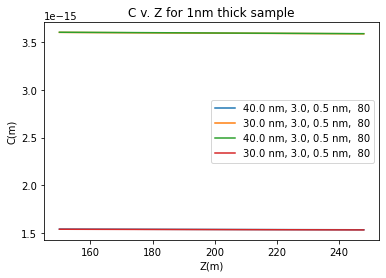

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    Nuni=all_params[key]['Nuni']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm,  {Nuni}')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

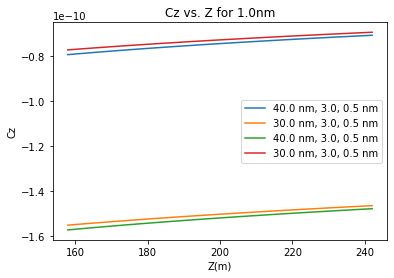

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

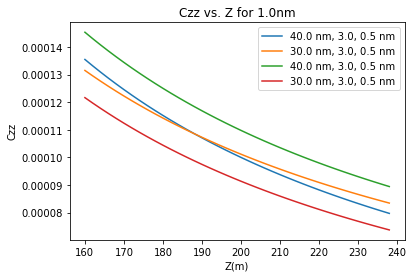

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 1200,
 'm+': 1200,
 'm-': 60,
 'h0': 0.5,
 'rho_max': 10000000.0,
 'z_max': 10000000.0,
 'min': 150.0,
 'max': 250.0,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 15.0,
 'HCone': 15000.0,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 500.0,
 'eps_r': 3.0,
 'Thickness_sample': 0.5,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 0,
 'Nuni': 80,
 'Equally spaced': False}

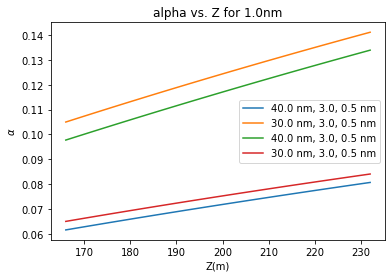

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

{'z': array([150., 152., 154., 156., 158., 160., 162., 164., 166., 168., 170.,
        172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
        194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
        216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236.,
        238., 240., 242., 244., 246., 248.]),
 'c': array([1.54170713e-15, 1.54155095e-15, 1.54139529e-15, 1.54124014e-15,
        1.54108549e-15, 1.54093134e-15, 1.54077768e-15, 1.54062449e-15,
        1.54047177e-15, 1.54031952e-15, 1.54016773e-15, 1.54001638e-15,
        1.53986548e-15, 1.53971501e-15, 1.53956498e-15, 1.53941536e-15,
        1.53926617e-15, 1.53911738e-15, 1.53896901e-15, 1.53882103e-15,
        1.53867345e-15, 1.53852626e-15, 1.53837945e-15, 1.53823302e-15,
        1.53808697e-15, 1.53794129e-15, 1.53779597e-15, 1.53765101e-15,
        1.53750641e-15, 1.53736216e-15, 1.53721827e-15, 1.53707471e-15,
        1.53693149e-15, 1.53678861e-15, 1.53664607e-15, 1.53650385e-15,


In [16]:
from scipy.optimize import curve_fit


In [17]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [18]:
all_data.keys()

dict_keys(['Original Tirmzi\\0336-RR_originalTirmzi-0002\\', 'Original Tirmzi\\0338-RR_originalTirmzi-0001\\', 'Original Tirmzi\\0340-RR_originalTirmzi-0003\\', 'Original Tirmzi\\0342-RR_originalTirmzi-0000\\'])

In [19]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)